In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from linearRegression import LinearRegression

In [29]:
duong_dan = 'car_detail_en.csv'

In [30]:
df = pd.read_csv(duong_dan)

In [31]:
print(df.head())

   ad_id             origin condition  car_model mileage exterior_color  \
0  17042  Domestic assembly   New car      Truck    0 Km          White   
1  53794           Imported   New car        SUV    0 Km          Black   
2  73954  Domestic assembly   New car  Crossover    0 Km         Silver   
3  74150           Imported   New car        SUV    0 Km          White   
4  87573  Domestic assembly   New car  Crossover    0 Km         Silver   

  interior_color num_of_doors seating_capacity         engine  ...  \
0           gray       2-door           2-seat  Petrol\t1.0 L  ...   
1          Black       5-door           7-seat  Petrol\t3.4 L  ...   
2          Brown       5-door           8-seat  Petrol\t2.0 L  ...   
3          Black       5-door           5-seat  Petrol\t1.8 L  ...   
4           gray       5-door           8-seat  Petrol\t2.0 L  ...   

  transmission                 drive_type fuel_consumption  \
0       Manual     RFD - Rear-wheel drive          L/100Km   
1   

In [32]:
print(len(df))

30652


In [33]:
df_nodup = df.drop_duplicates()

In [34]:
print(len(df_nodup))

30652


In [35]:
def convert_to_numeric(value):
    try:
        if 'Billion' in value and not 'Million' in value:
            return float(value.replace('Billion', '').replace(' ', '')) * 1e3
        elif 'Million' in value and not 'Billion' in value:
            return float(value.replace('Million', '').replace(' ', ''))
        else:
            return float(value.replace('Million', '').replace('Billion', '').replace(' ', ''))
    except:
        return None

In [36]:
df_nodup['price. price'] = df_nodup['price. price'].apply(convert_to_numeric)

In [37]:
def convert_km(mileage_str):
  if not isinstance(mileage_str, str):
    return None
  try:
    cleaned_str = mileage_str.replace(" Km", "").replace(",", "")
    return float(cleaned_str)
  except ValueError:
    return None

df_nodup["mileage"] = df_nodup["mileage"].apply(convert_km)

In [38]:
def convert_door(value):
    try:
        return int(str(value).split('-')[0])
    except (ValueError, AttributeError, IndexError):
        return None
df_nodup["num_of_doors"] = df_nodup["num_of_doors"].apply(convert_door)
df_nodup = df_nodup.drop(columns="condition", axis=1)

In [39]:
def convert_seating_capacity(value):
    try:
        return int(str(value).split('-')[0])
    except (ValueError, AttributeError, IndexError):
        return None

df_nodup["seating_capacity"] = df_nodup["seating_capacity"].apply(convert_seating_capacity)

In [40]:
df_nodup = df_nodup[df_nodup["fuel_consumption"] != "L/100Km"]
print(df_nodup.head())


     ad_id             origin           car_model  mileage exterior_color  \
1    53794           Imported                 SUV      0.0          Black   
5    97011  Domestic assembly         Van/Minivan      0.0          White   
8   142495  Domestic assembly  Bán tải / Pickup      0.0           Grey   
9   143308  Domestic assembly  Bán tải / Pickup      0.0          Black   
10  174951  Domestic assembly         Van/Minivan      0.0          White   

   interior_color  num_of_doors  seating_capacity         engine  \
1           Black             5                 7  Petrol\t3.4 L   
5            gray             5                 2  Petrol\t1.0 L   
8           Black             4                 5  Diesel\t2.2 L   
9           Black             4                 5  Diesel\t2.2 L   
10          Cream             4                 7  Diesel\t2.2 L   

                   fuel_system transmission                    drive_type  \
1                          NaN    Automatic     AWD

In [41]:
df_clearCols = df_nodup.drop(columns=['describe', 'brand', 'url', 'ad_id'])
df_clearCols

,origin,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,fuel_system,transmission,drive_type,fuel_consumption,grade,year_of_manufacture,car_name,price. price
1,Imported,SUV,0.0,Black,Black,5,7,Petrol\t3.4 L,NaN,Automatic,AWD - 4-wheel drive (AWD),10\tL/100Km,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,4286.0
5,Domestic assembly,Van/Minivan,0.0,White,gray,5,2,Petrol\t1.0 L,NaN,Manual,RFD - Rear-wheel drive,7\tL/100Km,Super Carry Van,2023.0,Suzuki Super Carry Van Blind Van 2023,299.0
8,Domestic assembly,Bán tải / Pickup,0.0,Grey,Black,4,5,Diesel\t2.2 L,Single turbo oil injection,Automatic,RFD - Rear-wheel drive,7\tL/100Km,Ranger,2023.0,Ford Ranger XLS 2.0L 4x2 AT 2023,688.0
9,Domestic assembly,Bán tải / Pickup,0.0,Black,Black,4,5,Diesel\t2.2 L,Single turbo oil injection,Automatic,4WD - Four-wheel drive (4WD),7\tL/100Km,Ranger,2023.0,Ford Ranger XLT 2.0L 4x4 AT 2023,830.0
10,Domestic assembly,Van/Minivan,0.0,White,Cream,4,7,Diesel\t2.2 L,TDCi,Manual,RFD - Rear-wheel drive,9\tL/100Km,Transit,2023.0,Ford Transit Ambulance 2023,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30638,Imported,SUV,9.0,Black,Black,5,8,Diesel,Electronic,Automatic,4WD - Four-wheel drive (4WD),6\tL/100Km,Rexton,2006.0,Ssangyong Rexton 2.5 2006,195.0
30641,Domestic assembly,Crossover,75000.0,White,Grey,5,5,Petrol,NaN,Automatic,FWD - Front-wheel drive,7\tL/100Km,EcoSport,2016.0,Ford EcoSport Titanium 2016,415.0
30642,Domestic assembly,Sedan,21000.0,Copper,Cream,4,5,Petrol,NaN,Automatic,FWD - Front-wheel drive,6\tL/100Km,Vios,2018.0,Toyota Vios 1.5G 2018,430.0
30645,Domestic assembly,SUV,38000.0,White,Black,5,5,Petrol,NaN,Automatic,FWD - Front-wheel drive,6\tL/100Km,i10,2021.0,Hyundai i10 1.2 AT 2021 car,395.0


In [42]:
df_clearCols.isnull().sum()


origin                    0
car_model                 0
mileage                   0
exterior_color            0
interior_color            0
num_of_doors              0
seating_capacity          0
engine                    0
fuel_system            5175
transmission              0
drive_type                0
fuel_consumption          0
grade                     0
year_of_manufacture      18
car_name                  0
price. price             72
dtype: int64

In [43]:
df_noFuel = df_clearCols.drop(columns=['fuel_system'])

In [44]:
df_noFuel = df_noFuel.rename({"price. price": "Price"}, axis=1)
df_noFuel

,origin,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,transmission,drive_type,fuel_consumption,grade,year_of_manufacture,car_name,Price
1,Imported,SUV,0.0,Black,Black,5,7,Petrol\t3.4 L,Automatic,AWD - 4-wheel drive (AWD),10\tL/100Km,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,4286.0
5,Domestic assembly,Van/Minivan,0.0,White,gray,5,2,Petrol\t1.0 L,Manual,RFD - Rear-wheel drive,7\tL/100Km,Super Carry Van,2023.0,Suzuki Super Carry Van Blind Van 2023,299.0
8,Domestic assembly,Bán tải / Pickup,0.0,Grey,Black,4,5,Diesel\t2.2 L,Automatic,RFD - Rear-wheel drive,7\tL/100Km,Ranger,2023.0,Ford Ranger XLS 2.0L 4x2 AT 2023,688.0
9,Domestic assembly,Bán tải / Pickup,0.0,Black,Black,4,5,Diesel\t2.2 L,Automatic,4WD - Four-wheel drive (4WD),7\tL/100Km,Ranger,2023.0,Ford Ranger XLT 2.0L 4x4 AT 2023,830.0
10,Domestic assembly,Van/Minivan,0.0,White,Cream,4,7,Diesel\t2.2 L,Manual,RFD - Rear-wheel drive,9\tL/100Km,Transit,2023.0,Ford Transit Ambulance 2023,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30638,Imported,SUV,9.0,Black,Black,5,8,Diesel,Automatic,4WD - Four-wheel drive (4WD),6\tL/100Km,Rexton,2006.0,Ssangyong Rexton 2.5 2006,195.0
30641,Domestic assembly,Crossover,75000.0,White,Grey,5,5,Petrol,Automatic,FWD - Front-wheel drive,7\tL/100Km,EcoSport,2016.0,Ford EcoSport Titanium 2016,415.0
30642,Domestic assembly,Sedan,21000.0,Copper,Cream,4,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,Vios,2018.0,Toyota Vios 1.5G 2018,430.0
30645,Domestic assembly,SUV,38000.0,White,Black,5,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,i10,2021.0,Hyundai i10 1.2 AT 2021 car,395.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_3496\3311697470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noFuel['Price'])


<Axes: xlabel='Price', ylabel='Density'>

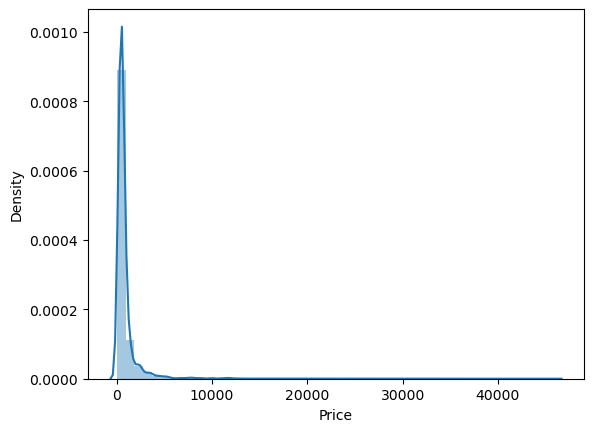

In [45]:
sns.distplot(df_noFuel['Price'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3496\3345985692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

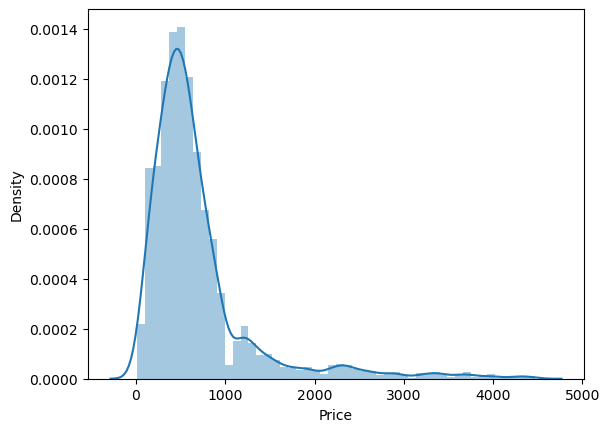

In [46]:

df1 = df_noFuel[df_noFuel['Price'] < df_noFuel['Price'].quantile(0.98)]
sns.distplot(df1['Price'])

In [47]:
df1["mileage"]

1            0.0
5            0.0
8            0.0
9            0.0
10           0.0
          ...   
30638        9.0
30641    75000.0
30642    21000.0
30645    38000.0
30646    67000.0
Name: mileage, Length: 11136, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_3496\349551231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

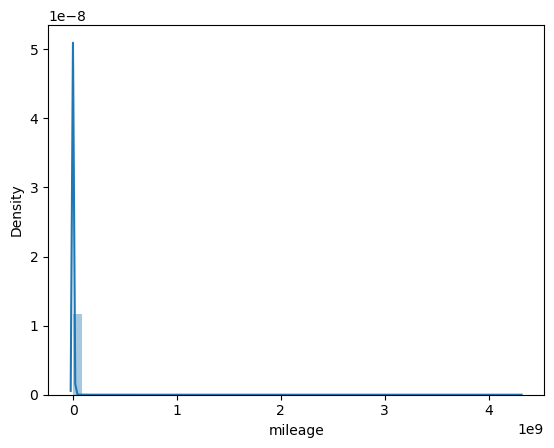

In [48]:
df1 = df1[df1['mileage'] != 0]
sns.distplot(df1['mileage'])

0


C:\Users\Admin\AppData\Local\Temp\ipykernel_3496\3012501641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['mileage'])


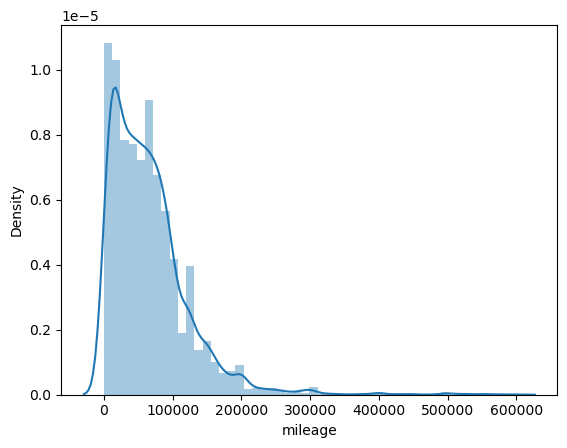

In [49]:
df2 = df1[df1['mileage'] < df1['mileage'].quantile(0.98)]
sns.distplot(df2['mileage'])
print(len(df2[df2['mileage']==0]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_3496\1652347279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['year_of_manufacture'])


<Axes: xlabel='year_of_manufacture', ylabel='Density'>

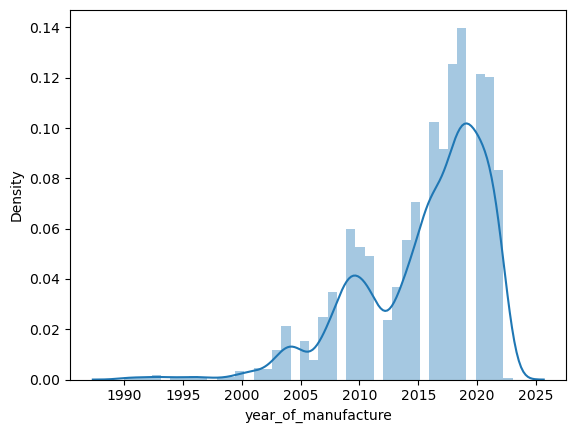

In [50]:
sns.distplot(df2['year_of_manufacture'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3496\967550348.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['year_of_manufacture'])


<Axes: xlabel='year_of_manufacture', ylabel='Density'>

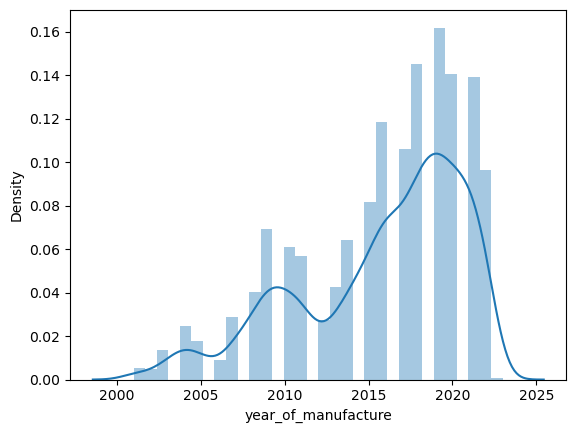

In [51]:
df3 = df2[df2['year_of_manufacture'] > 2000]
sns.distplot(df3['year_of_manufacture'])

In [52]:
data_cleaned = df3.reset_index(drop=True)
data_cleaned.to_csv('car_detail_cleaned.csv', index=False)  

In [53]:
data_cleaned.columns

Index(['origin', 'car_model', 'mileage', 'exterior_color', 'interior_color',
       'num_of_doors', 'seating_capacity', 'engine', 'transmission',
       'drive_type', 'fuel_consumption', 'grade', 'year_of_manufacture',
       'car_name', 'Price'],
      dtype='object')

In [54]:
print(data_cleaned['exterior_color'].unique())

['Sand' 'White' 'Silver' 'Black' 'Green' 'Red' 'Take note' 'Yellow'
 'Brown' 'Grey' 'Orange' 'Pink' 'Cream' 'Copper' 'Violet'
 'Different color' 'Colorful' '-']
